In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import os

In [2]:
# Import dataset
load_dotenv()
dataset_path=os.getenv("DATASET_PATH")
dataset = pd.read_csv(dataset_path)
dataset.head()

,RID,Gender,Ageatscreening,Diagnosis,MMSE0m,HipsASMbaseline,HipsContrastbaseline,HipsCorelationbaseline,HipsVariancebaseline,HipsSumAveragebaseline,...,ERCsContrastbaseline,ERCsCorelationbaseline,ERCsVariancebaseline,ERCsSumAveragebaseline,ERCsSumVariancebaseline,ERCsEntropybaseline,ERCsClusterShadebaseline,ERCs_thicknessbaseline,ERCsVolumebaseline,HipposcampusVolumebaseline
0,3,0,81.3479,3,20.0,NaN,158.27,0.63,218.30,28.37,...,253.10,0.40,208.65,23.39,581.50,NaN,-2568.19,2.31,1176.0,3047.0
1,4,0,67.6904,1,27.0,0.06,147.64,0.55,173.64,44.72,...,220.88,0.48,215.70,33.74,641.90,3.33,4113.01,2.76,1942.0,3449.0
2,5,0,73.8027,0,29.0,0.10,199.66,0.55,222.27,41.18,...,220.37,0.54,232.18,29.18,708.36,2.87,-1388.41,3.18,2044.0,3441.0
3,8,1,84.5945,0,28.0,0.08,184.21,0.53,201.55,43.04,...,198.42,0.54,220.48,26.68,683.50,2.77,-2506.55,2.68,1959.0,2875.0
4,10,1,73.9726,3,24.0,0.11,233.02,0.48,229.88,39.46,...,196.55,0.53,210.63,26.60,645.95,2.72,-1164.02,2.64,1397.0,2700.0


In [3]:
missing_data = dataset.isna().sum().sort_values()
missing_data

RID                            0
Gender                         0
Ageatscreening                 0
Diagnosis                      0
HipsSumAveragebaseline         1
MMSE0m                         3
ERCsASMbaseline                4
HipsSumVariancebaseline        7
HipsVariancebaseline           8
ERCsEntropybaseline            9
ERCsSumAveragebaseline        11
ERCsSumVariancebaseline       13
ERCsVariancebaseline          14
HipsContrastbaseline          14
ERCsVolumebaseline            14
ERCsContrastbaseline          18
HipsClusterShadebaseline      18
HipposcampusVolumebaseline    19
HipsCorelationbaseline        20
HipsEntropybaseline           23
HipsASMbaseline               25
ERCsCorelationbaseline        28
ERCsClusterShadebaseline      34
ERCs_thicknessbaseline        37
dtype: int64

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset.drop("Diagnosis", axis=1),  
    dataset["Diagnosis"],  
    test_size=0.3,  
    random_state=42,  
)

X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

X_train.shape, X_test.shape

((425, 23), (183, 23))

In [15]:
imputer = KNNImputer(
    n_neighbors=10,
    weights='distance', 
    metric='nan_euclidean', 
    add_indicator=False, 
)

imputer.fit(X_train)

KNNImputer(n_neighbors=10, weights='distance')

In [6]:
train_t = imputer.transform(X_train)
test_t = imputer.transform(X_test)

X_train_t = pd.DataFrame(train_t, columns=X_train.columns)
X_test_t = pd.DataFrame(test_t, columns=X_test.columns)

X_train_t.head()

,RID,Gender,Ageatscreening,MMSE0m,HipsASMbaseline,HipsContrastbaseline,HipsCorelationbaseline,HipsVariancebaseline,HipsSumAveragebaseline,HipsSumVariancebaseline,...,ERCsContrastbaseline,ERCsCorelationbaseline,ERCsVariancebaseline,ERCsSumAveragebaseline,ERCsSumVariancebaseline,ERCsEntropybaseline,ERCsClusterShadebaseline,ERCs_thicknessbaseline,ERCsVolumebaseline,HipposcampusVolumebaseline
0,362.0,1.0,70.5479,24.0,0.09000,177.159949,0.45,213.60,42.73,615.39,...,257.59,0.43,224.580000,29.39,640.73,2.96,57.73,2.53,1278.0,2448.0
1,869.0,1.0,83.0521,26.0,0.08000,165.750000,0.51,179.00,43.23,550.26,...,217.25,0.51,217.430000,28.37,652.46,2.72,2072.42,2.61,1027.0,2349.0
2,1257.0,0.0,85.0849,20.0,0.15000,147.660000,0.57,180.78,31.82,575.46,...,287.61,0.39,233.070000,29.95,644.68,2.95,-467.36,2.45,1819.0,3631.0
3,384.0,0.0,79.8740,29.0,0.12000,184.280000,0.58,215.56,37.63,677.96,...,204.92,0.52,222.941393,29.07,654.06,2.98,1421.62,3.48,2002.0,3400.0
4,2.0,0.0,74.4548,28.0,0.10387,217.010000,0.53,228.40,29.23,696.61,...,217.01,0.53,228.400000,29.23,696.61,2.83,-507.05,3.36,1945.0,4210.0


In [7]:
X_train_t.isnull().sum()  # Shows the count of missing values in the imputed training set

RID                           0
Gender                        0
Ageatscreening                0
MMSE0m                        0
HipsASMbaseline               0
HipsContrastbaseline          0
HipsCorelationbaseline        0
HipsVariancebaseline          0
HipsSumAveragebaseline        0
HipsSumVariancebaseline       0
HipsEntropybaseline           0
HipsClusterShadebaseline      0
ERCsASMbaseline               0
ERCsContrastbaseline          0
ERCsCorelationbaseline        0
ERCsVariancebaseline          0
ERCsSumAveragebaseline        0
ERCsSumVariancebaseline       0
ERCsEntropybaseline           0
ERCsClusterShadebaseline      0
ERCs_thicknessbaseline        0
ERCsVolumebaseline            0
HipposcampusVolumebaseline    0
dtype: int64

In [8]:
X_test_t.isnull().sum()  # Shows the count of missing values in the imputed training set

RID                           0
Gender                        0
Ageatscreening                0
MMSE0m                        0
HipsASMbaseline               0
HipsContrastbaseline          0
HipsCorelationbaseline        0
HipsVariancebaseline          0
HipsSumAveragebaseline        0
HipsSumVariancebaseline       0
HipsEntropybaseline           0
HipsClusterShadebaseline      0
ERCsASMbaseline               0
ERCsContrastbaseline          0
ERCsCorelationbaseline        0
ERCsVariancebaseline          0
ERCsSumAveragebaseline        0
ERCsSumVariancebaseline       0
ERCsEntropybaseline           0
ERCsClusterShadebaseline      0
ERCs_thicknessbaseline        0
ERCsVolumebaseline            0
HipposcampusVolumebaseline    0
dtype: int64

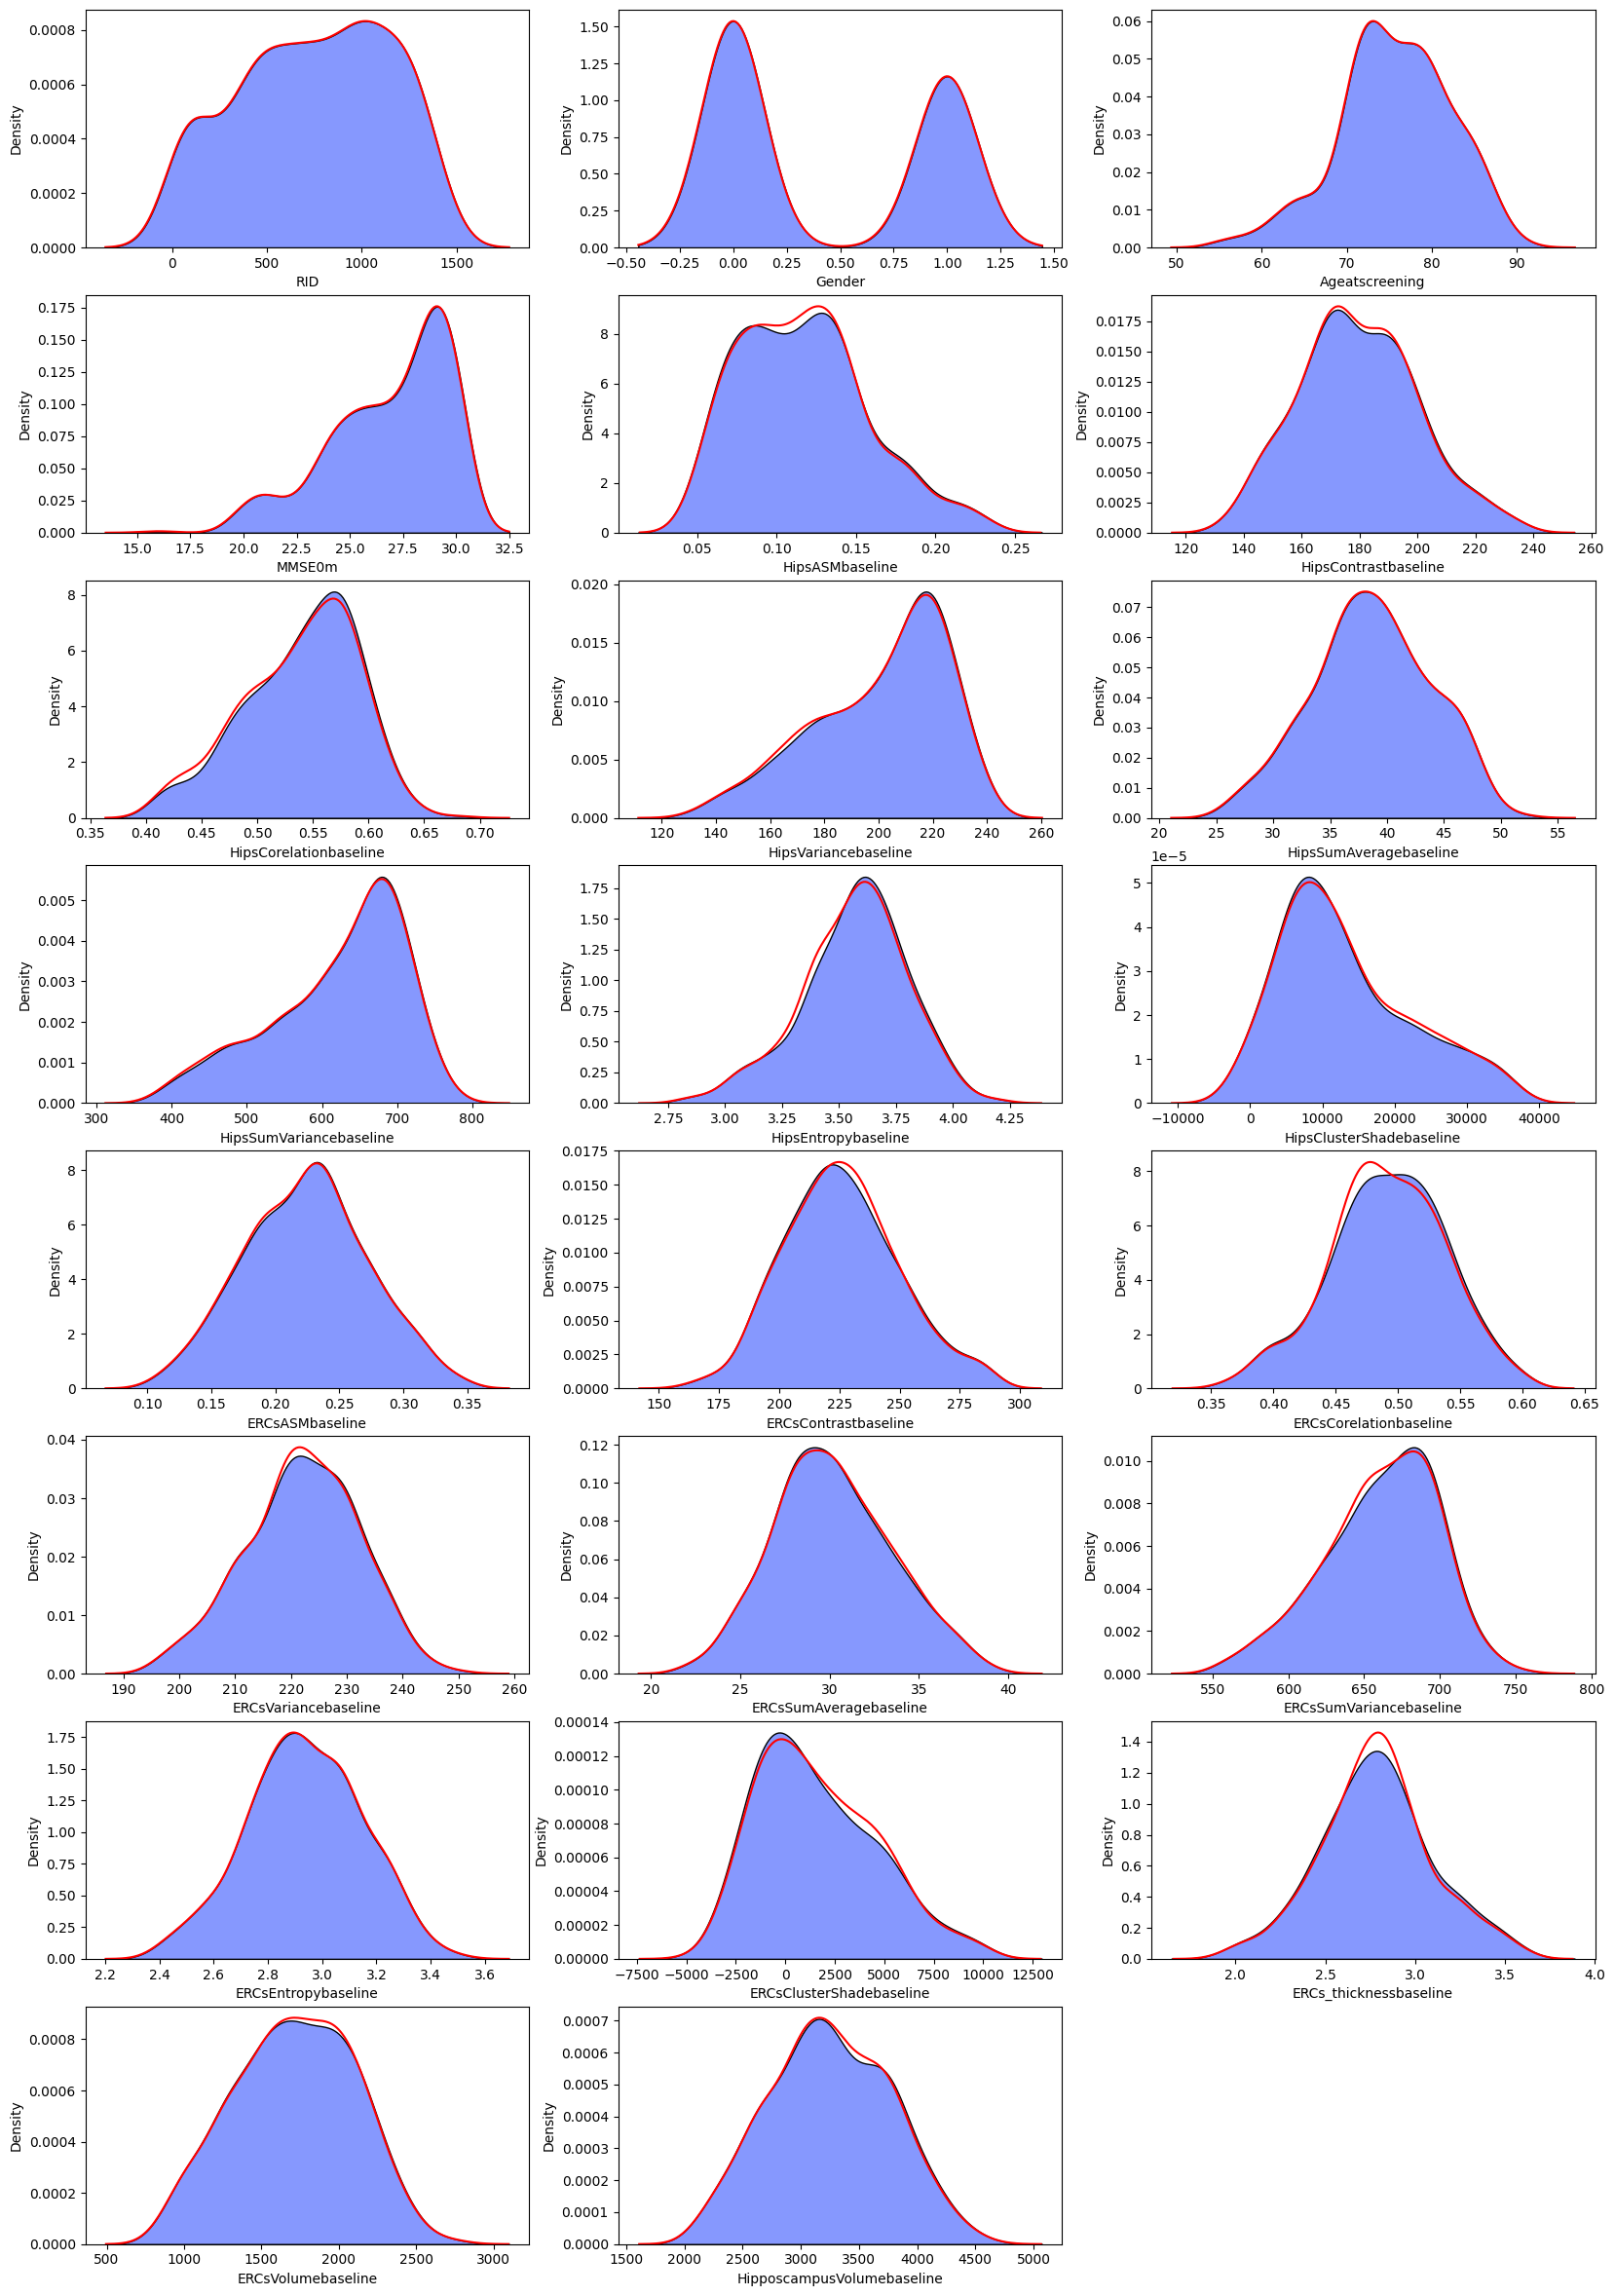

In [9]:
# Plot each column using histograms
plt.figure(figsize=(20, 45))

for i in range(len(X_train_copy.columns)):
    plt.subplot(12,3,i+1)
    sns.kdeplot(X_train_copy[X_train_copy.columns[i]], color="#5e76fe", multiple="stack")

    plt.subplot(12,3,i+1)
    sns.kdeplot(X_train_t[X_train_t.columns[i]], color= "red")

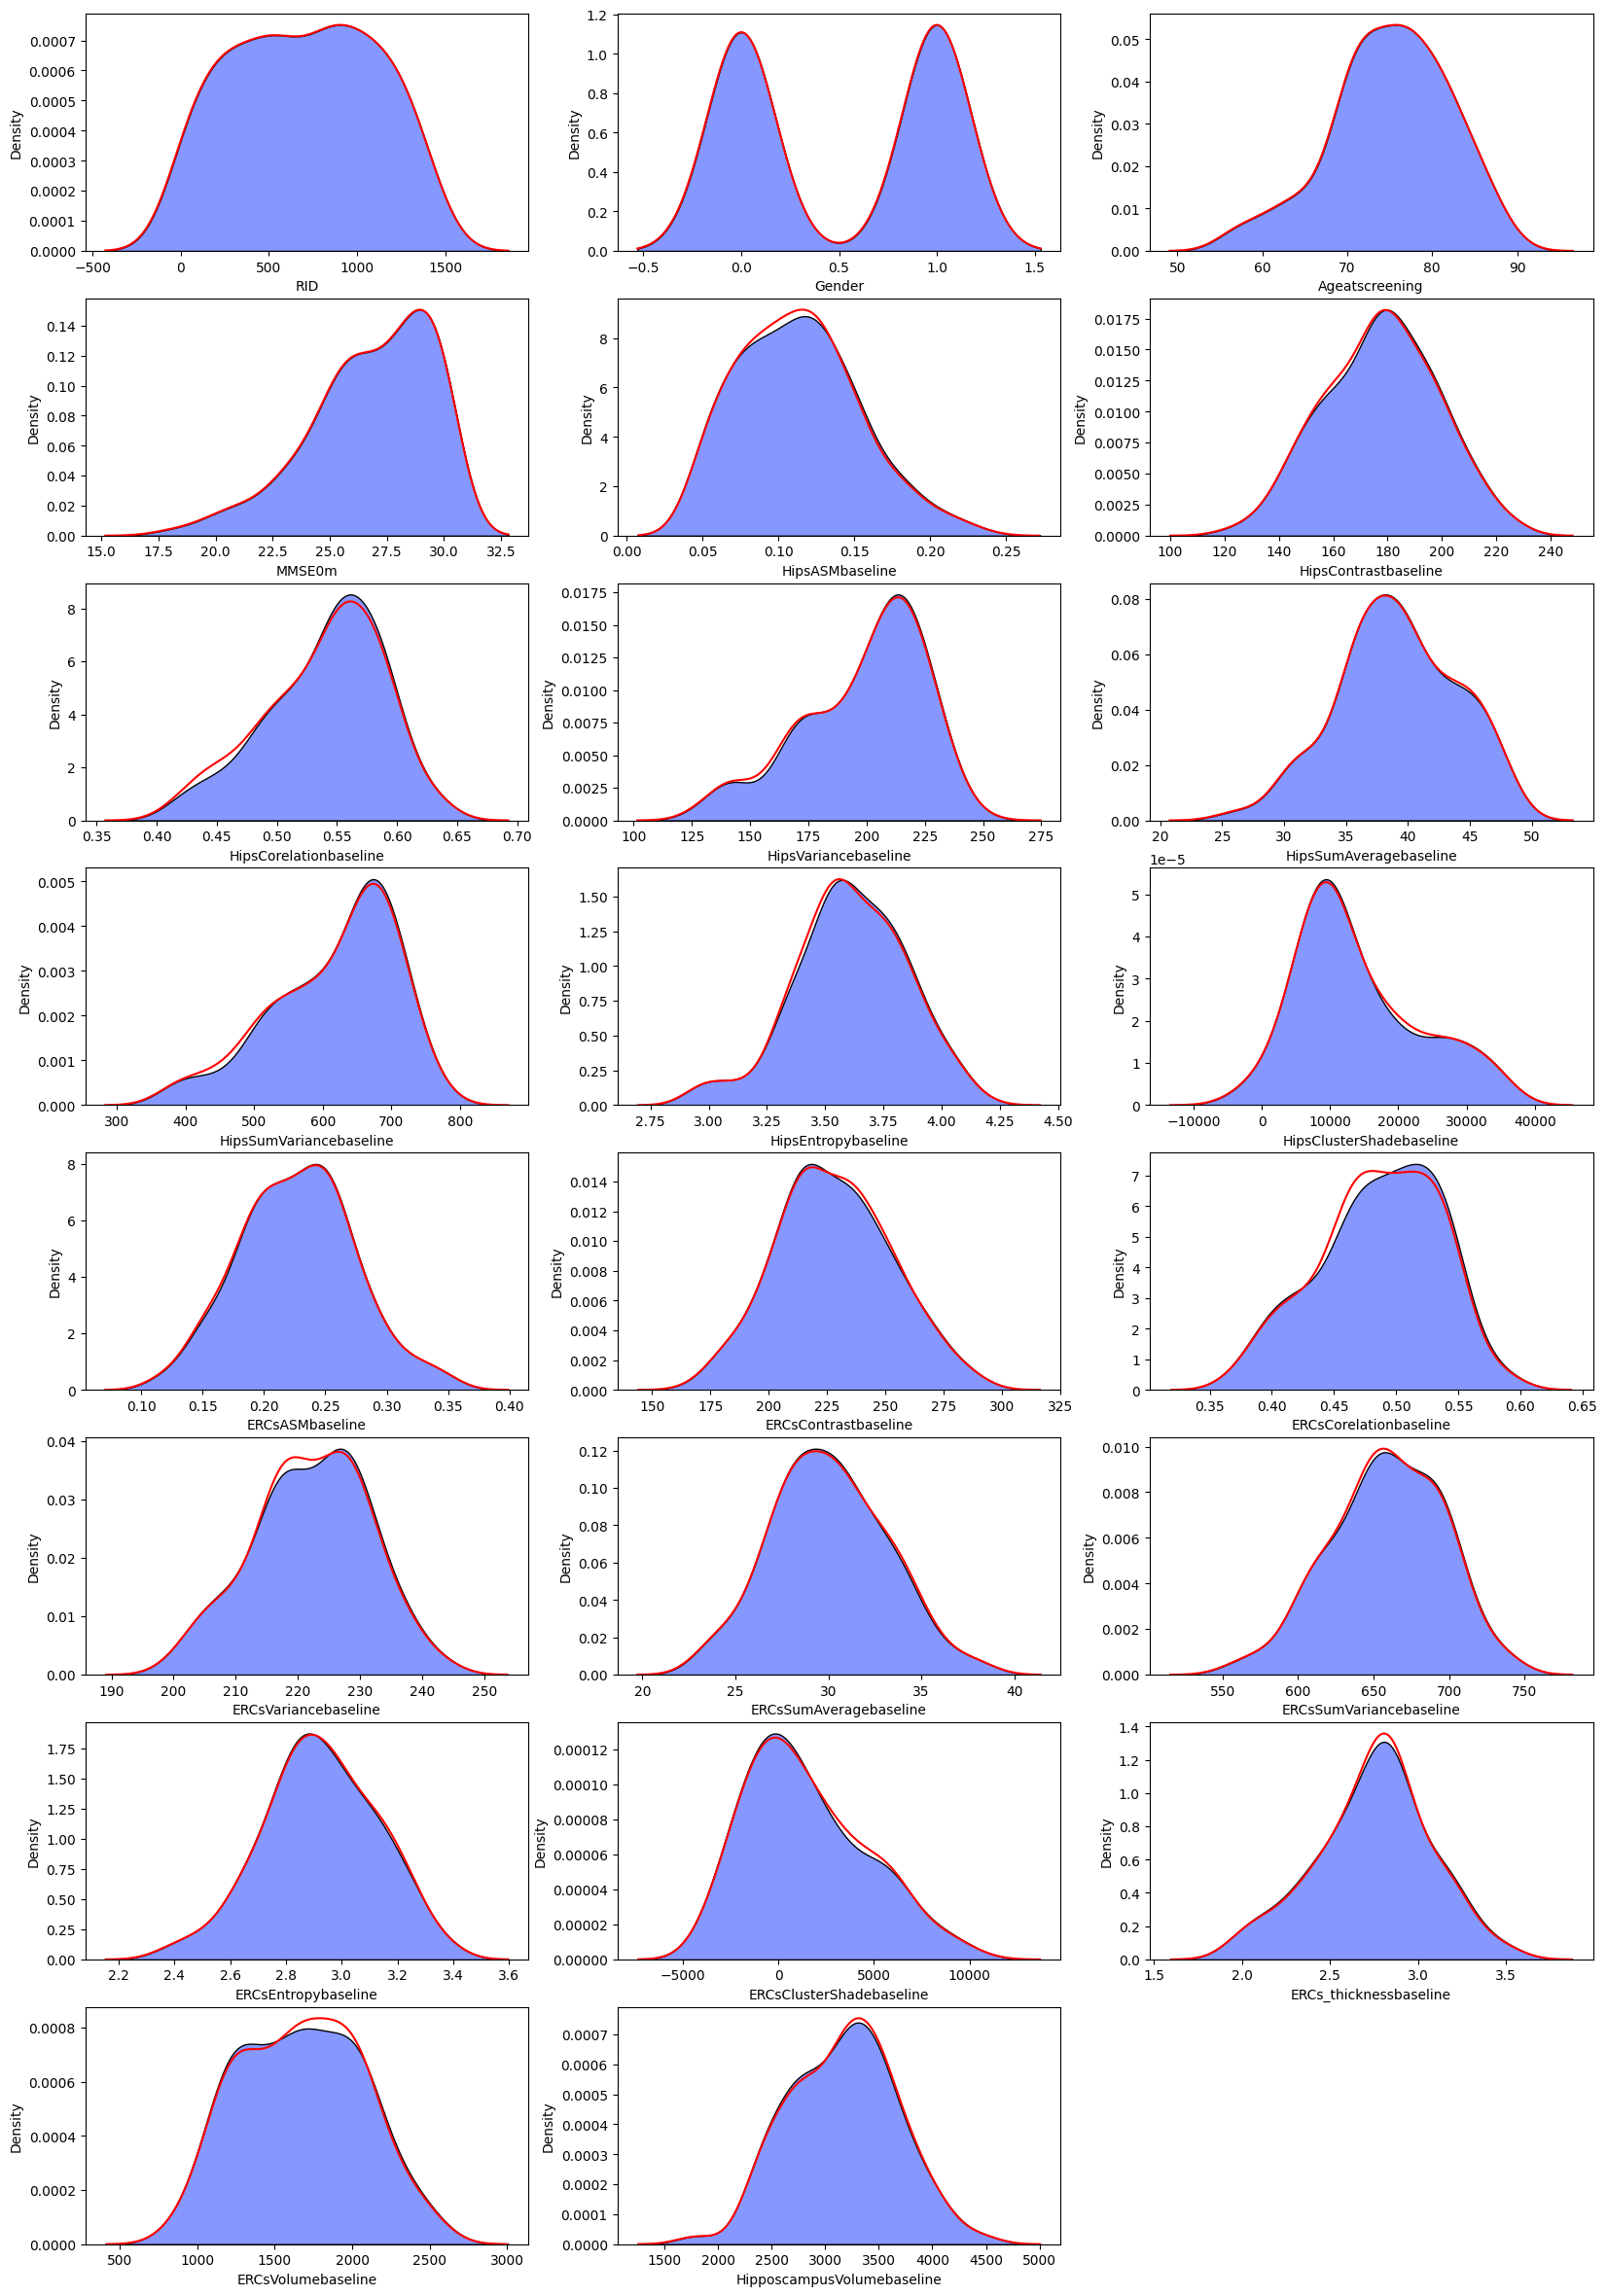

In [10]:
# Plot each column using histograms
plt.figure(figsize=(20, 45))

for i in range(len(X_test_copy.columns)):
    plt.subplot(12,3,i+1)
    sns.kdeplot(X_test_copy[X_test_copy.columns[i]], color="#5e76fe", multiple="stack")

    plt.subplot(12,3,i+1)
    sns.kdeplot(X_test_t[X_test_t.columns[i]], color= "red")

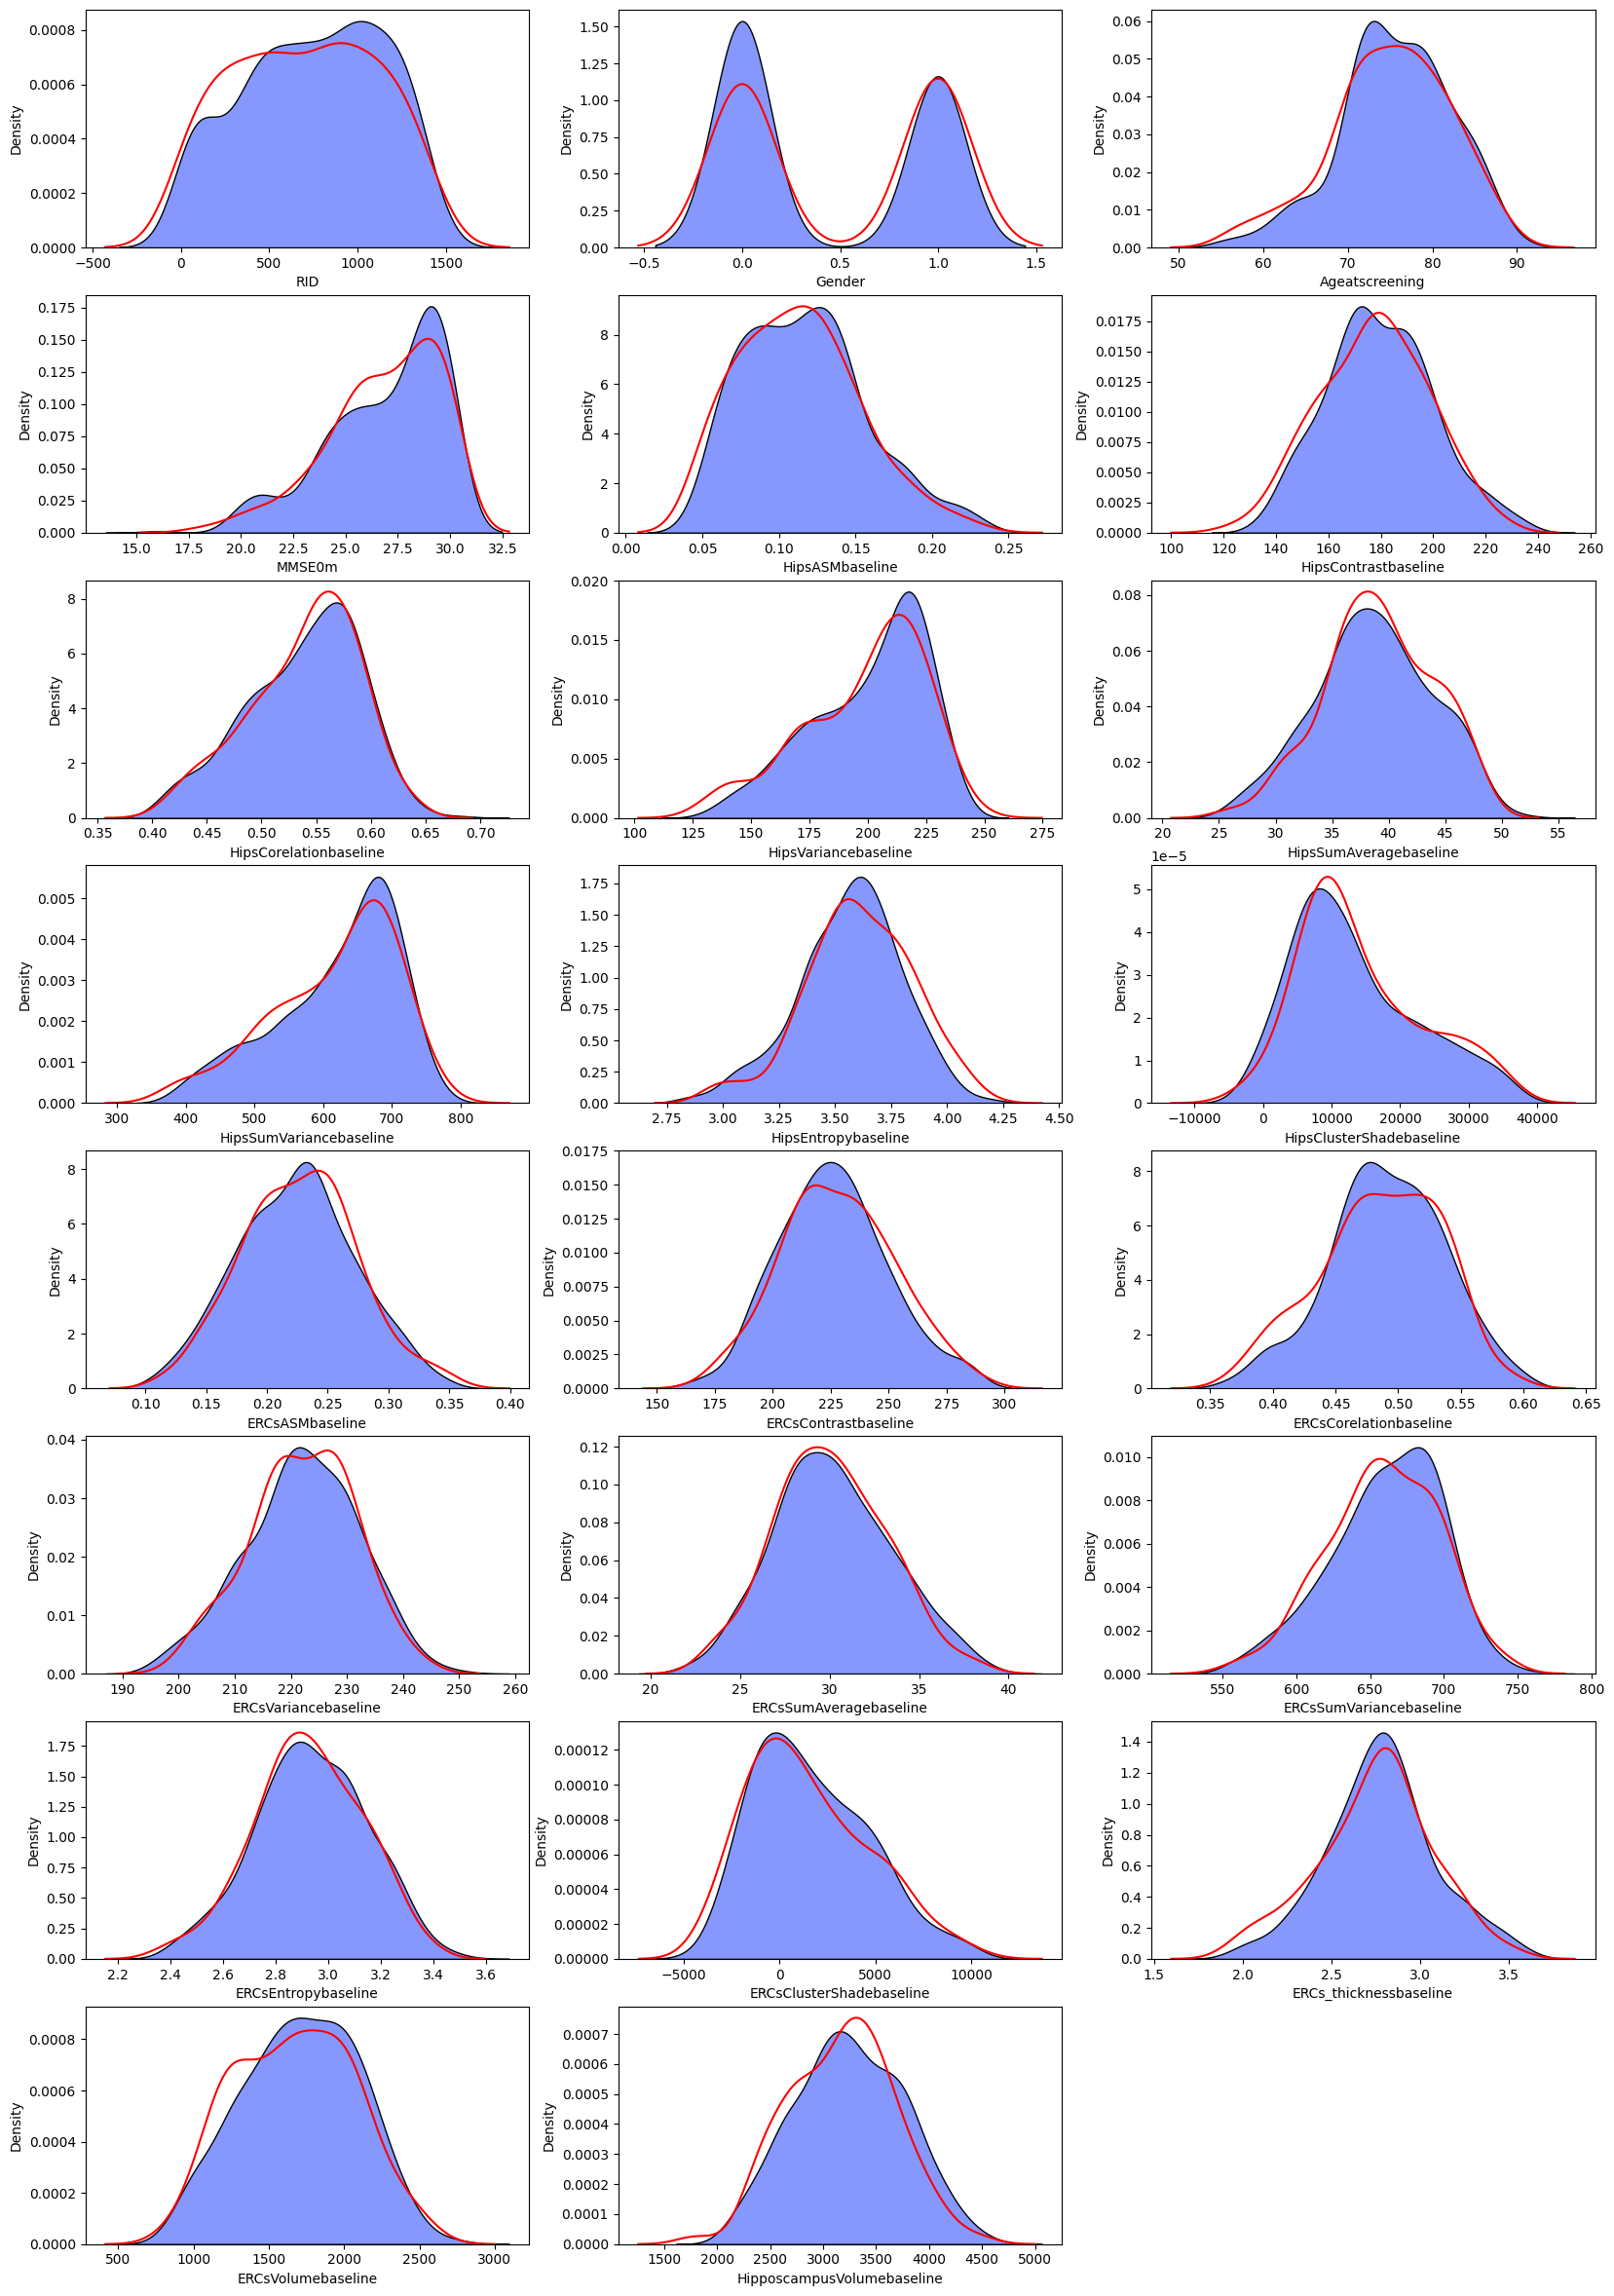

In [11]:
# Plot each column using histograms
plt.figure(figsize=(20, 45))

for i in range(len(X_train_t.columns)):
    plt.subplot(12,3,i+1)
    sns.kdeplot(X_train_t[X_train_t.columns[i]], color="#5e76fe", multiple="stack")

    plt.subplot(12,3,i+1)
    sns.kdeplot(X_test_t[X_test_t.columns[i]], color= "red")

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, roc_auc_score)

def run_random_forest(X_train, X_test, y_train, y_test):

        # Initialize the Random Forest with class weight balancing
        rf = RandomForestClassifier(n_estimators=100,
                                    max_depth=5,
                                    random_state=42,
                                    class_weight="balanced",
        )
        
        # Fit the model
        rf.fit(X_train, y_train)
        
        # Get predicted probabilities for ROC AUC
        pred_train_proba = rf.predict_proba(X_train)
        pred_test_proba = rf.predict_proba(X_test)
        
        # Get predicted accuracy values
        pred_train_norm = rf.predict(X_train)
        pred_test_norm = rf.predict(X_test)
        
        # Calculate ROC-AUC
        roc_score_train = roc_auc_score(y_train, 
                                        pred_train_proba, 
                                        average="weighted", 
                                        multi_class="ovr",
        )
        roc_score_test = roc_auc_score(y_test,
                                    pred_test_proba,  
                                    average="weighted", 
                                    multi_class="ovr",
        )
        
        # Calculate accuracies
        accuracy_train = accuracy_score(y_train, pred_train_norm)
        accuracy_test = accuracy_score(y_test, pred_test_norm)
        
        # Print results
        print(f"Train ROC-AUC: {roc_score_train}")
        print(f"Train Accuracy: {accuracy_train}")
        print(f"Test ROC-AUC: {roc_score_test}")
        print(f"Test Accuracy: {accuracy_test}")
        
run_random_forest(X_train_t, X_test_t, y_train, y_test)

Train ROC-AUC: 0.9810647433791344
Train Accuracy: 0.8776470588235294
Test ROC-AUC: 0.8173169484014253
Test Accuracy: 0.5628415300546448
